# Equations of Turbulence -- Part 1

## Einstein notation

In fluid dynamics, the manipulation of equations can become tedious, due to the complexity and the number of terms involved in the Navier-Stokes equations and equations of energy. This community has enthusiastically embraced the **Einstein index tensor notation** in which, $d$ being the dimension of the problem $(1,2,3)$,
* $a$ defines a scalar (single value) or tensor of rank 0.
* $a_i$ defines a vector, or tensor of rank 1, with $d$ components.
* $a_{ij}$ defines a matrix, or tensor of rank 2, with $d^2$ components.
* $a_{ijk}$ defines a matrix, or tensor of rank 3, with $d^3$ components.
* A tensor of rank $n$ has $d^n$ components

<div class="alert alert-block alert-danger">
    <b>Rule 1:</b> In other words, with Einstein notation, each index can only take the values $1,2$ in 2D and $1,2,3$ in 3D.
</div>

The genius of Einstein notation is in the following rule:
<div class="alert alert-block alert-danger">
    <b>Rule 2:</b> If any index repeats <b>twice</b> in a <b>term</b>, summation over all possible values of that index is implied.
    </div>

A term is a single tensor, a product of tensors, a product of tensor by a function of a tensor, a product of two functions of tensor. It **cannot be** the addition or subtraction of two tensors.
    
Consider the tensor of rank 2 in 3D:
$$
a_{ij}=\left(\begin{matrix}a_{11} & a_{12} & a_{13}\\ 
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}\end{matrix}\right)
$$
$a_{ii}$ is the trace of the tensor:

$$
a_{ii}  = a_{11} + a_{22} + a_{33} = \sum_{i=1,3}a_{ii}
$$

$a_{ik}b_k$ is the product of tensor $a_{ij}$ by vector $b_i$:

$$
a_{ik}b_k =\left(\begin{matrix}a_{11} & a_{12} & a_{13}\\ 
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}\end{matrix}\right)\left(\begin{matrix}
b_1 \\ b_2 \\ b_3\end{matrix}\right)
$$

$a_{iiij}$ is in violation of Rule 2, Einstein's index notation rule and therefore is ill-defined.

The last rule is one of consistency:
<div class="alert alert-block alert-danger">
    <b>Rule 3:</b> A tensorial equation using index notation should always be <b>self-consistent</b> with respect to the indices of each term of the equation, unless an additional rule is explicitely specified. 
    </div>
    
The simple equation $a_i=b_j$ is ill-defined. In 2D, does it mean $(a_1=b_1,a_2=b_2)$ or $(a_1=b_2,a_2=b_1)$? In mathematics, nothing should be left to the interpretation of the reader, especially if the reader grades your work. It is highly unusual for an additional rule to be needed. 

<div class="alert alert-block alert-info">
    <b>Tip:</b> Always check the consistency of your equations. Mentally eliminate all indices that repeat twice (implicit summation, rule 2) and confirm that each term contains the same indices that show only once in each term.
    </div>

Therefore $a_{ii}=b_{jj}$ and $a_{iik}=b_{jjk}$ are both well-defined. In the first equation, each term simplifies to a scalar; the traces of tensors $a$ and $b$ are equal.

There are two tensors that are important to remember:
* The Kronecker tensor:
<div class="alert alert-block alert-danger">
    $$
    \delta_{ij}=\begin{cases}1 &\mathrm{if}\;i=j\\0 &\mathrm{if}\;i\neq j\end{cases}
    $$
    </div>
* The permutation tensor (in 3D):
<div class="alert alert-block alert-danger">
    $$
    \varepsilon_{ijk}=\begin{cases}+1 &\mathrm{if}\;(i,j,k)\;\mathrm{is}\;(1,2,3),\;(2,3,1),\;\mathrm{or}\;(3,1,2)\\-1 &\mathrm{if}\;(i,j,k)\;\mathrm{is}\;(1,3,2),\;(2,1,3),\;\mathrm{or}\;(3,2,1)\\0 &\mathrm{if}\;i=j\;\mathrm{or}\;i=k\;\mathrm{or}\;j=k\end{cases}
    $$
    </div>

## Definition of the main equation types in fluid dynamics

The study of turbulence requires a solid understanding of the connection between equations and physics. But first, we should define some basic notations:
* $\partial_t$ is the partial derivative in time.
* $\partial_i$ is the partial derivative in space along direction $i$.
* $x_i$ is the vector position in space. Directions $(1,2,3)$ are $(x,y,z)$.
* $u_i$ is the local (in time and space) fluid velocity vector. $u_i=\vec{u}(x_1,x_2,x_3,t)$.
* $p$ is the local (in time and space) fluid pressure.
* $\theta$ is the local (in time and space) fluid temperature.
* $\rho,\; \mu,\; \nu,\;\kappa,\;\alpha,\; C_p$, are the local thermodynamic properties of the fluid, density, dynamic viscosity, kinematic viscosity, thermal conductivity, thermal diffusivity and specific heat, respectively. Remember that $\nu=\mu/\rho$ and $\alpha=\kappa/(\rho C_p)$.
* $\partial_i u_i$ is, by virtue of Rule 2 of Einstein notation, the divergence of vector $u_i$.
* $\partial_k p$ is the gradient of $p$.
* $\omega_k = \varepsilon_{ijk}\partial_iu_j$ is the curl of vector $\vec{u}$, or vorticity vector.
* $S_{ij}=\frac{1}{2}(\partial_iu_j+\partial_iu_j)$ is the strain rate tensor.
* $\Omega_{ij}=\frac{1}{2}(\partial_iu_j-\partial_iu_j)$ is the rotation rate tensor.

Using python we can explore the physics of different equations. Note that the method of derivativation used here is not explained at this stage of the course, however because of the method employed the domain must be periodic.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
"""
Critical functions, do not modify unless you know what you are doing
"""
def init_domain(N,L):
    dx = L/N
    x = np.arange(0.0, L, L/float(N))
    if N % 2 == 0:
        k = np.asarray(range(0, N // 2))
        k = np.append(k,0)
        k = np.append(k,range(-N // 2 + 1,0))*2 * np.pi / L
    else:
        k = np.asarray(range(0,(N - 1) // 2))
        k = np.append(k,0)
        k = np.real(np.append(k,range(-(N - 1) // 2, 0)))*2 * np.pi / L

    return x,k,dx
def der_x(u,k):
    return np.real(np.fft.ifft(1.0j * k * np.fft.fft(u)))
def advection(c,u,k):
    return -c*der_x(u,k)

def time_advancement_nonlinear_pure_advection(u0,T,dt_fixed,k,dx):
    t = 0
    CFL = 0.1
    u = np.copy(u0)
    while t < T :
        dt_cfl = CFL * dx / np.amax(u)
        dt = np.amin([dt_cfl,dt_fixed])
        if t + dt > T:
            dt = T - t
#         print(dt)
        uold = np.copy(u)
        # step 1
        u += (dt/2) * advection(uold,uold,k)
        #step 2
        u = uold + dt * advection(u,u,k)
        t += dt
    return u

def time_advancement_linear_pure_advection(c,u0,T,dt_fixed,k,dx):
    t = 0
    CFL = 0.1
    u = np.copy(u0)
    while t < T :
        dt_cfl = CFL * dx / np.amax(c)
        dt = np.amin([dt_cfl,dt_fixed])
        if t + dt > T:
            dt = T - t
        uold = np.copy(u)
        # step 1
        u += (dt/2) * advection(c,uold,k)
        #step 2
        u = uold + dt * advection(c,u,k)
        t += dt
    return u
    

### Coherent (or deterministic) structure
A basic coherent structure of physics is the wave, characterized by three parameters:
* amplitude $A$ (velocity scale of the structure)
* wavelength $k$, not to be confused with the index $k$ (inverse of the length scale of structure)
* phase $\phi$
or 
$$
u=A\cos(kx+\phi)
$$

Throughout this notebook we explore how basic structures are affected by different equations
### Pure advection at constant speed

The first basic type of equation is the <b>transport</b> equation, which transports a quantity with the flow. Starting with a flow of constant velocity $c$, the most basic transport equation of scalar $u$ in 1D reads:
$$
\partial_tu+c\partial_1u = 0
$$

Use the following code to verify that a basic wave as initial condition
$$
u(x,t=0)=A\cos(kx+\phi)
$$
is convected with no loss of amplitude, no modification of wavelength and phase. The exact solution of this transport equation is
$$
u(x,t)=A\cos(k(x-ct)+\phi)
$$





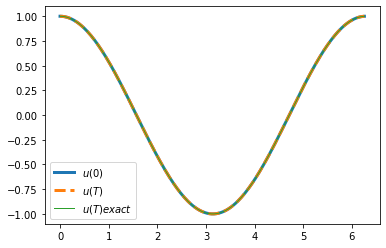

In [6]:
def u_exact(t,x,c,A,k,phi):
    return A*np.cos(k*(x-t*c)+phi)
L = 2*np.pi
N = 256
A = 1.
k = 1.
phi = 0
# constant flow velocity
c0 = 2.*np.pi
dt = 0.001
T = 1
x,kx,dx = init_domain(N,L)
c = c0*np.ones_like(x)
u0 = u_exact(0.,x,c,A,k,phi)
uTexact = u_exact(T,x,c,A,k,phi)
u = np.zeros_like(x)
u = time_advancement_linear_pure_advection(c,u0,T,dt,kx,dx)
plt.figure()
plt.plot(x,u0,lw = 3,label="$u(0)$")
plt.plot(x,u,'--',lw = 3,label="$u(T)$")
plt.plot(x,u,'-',lw = 1,label="$u(T) exact$")
plt.legend()
plt.show()

### A very useful tool

Fourier series are ideal to study waves. For a given spatial distribution of velocity $u(x)$, its Fourier series is 
$$
u(x)=a_0+\sum_{k=1}^\infty\left[a_k\cos\left(\frac{2\pi k}{L}x\right)+b_k\sin\left(\frac{2\pi k}{L}x\right)\right]
$$
where
\begin{eqnarray}
a_0 &= \int_0^Lu(x)dx \\
a_k &= \frac{2}{L}\int_{-L/2}^{+L/2}u(x)\cos\left(\frac{2\pi k}{L}x\right)dx\\
b_k &= \frac{2}{L}\int_{-L/2}^{+L/2}u(x)\sin\left(\frac{2\pi k}{L}x\right)dx\\
\end{eqnarray}

In numpy, the function fft (Fast Fourier Transform) can be used to obtained the coefficients in the form of complex numbers for $N/2+1$ wavenumbers $k_i$, $a_i$ being the real coefficients and $b_i$ the imaginary coefficients.

The amplitude of the wave for the structure of wavenumber $k$ is
$$
A_k=\sqrt{a_k^2+b_k^2}
$$
and the phase is
$$
\phi_k =\arctan\frac{b_k}{a_k}
$$

In the case above

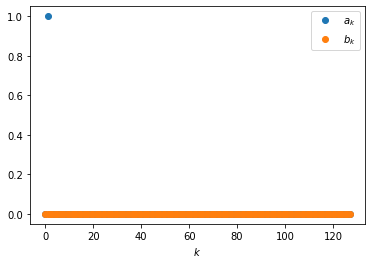

In [7]:
Fu = np.fft.fft(uTexact)/(N//2)
plt.plot(kx[0:N//2],np.real(Fu[0:N//2]),'o',label="$a_k$")
plt.plot(kx[0:N//2],np.imag(Fu[0:N//2]),'o',label="$b_k$")
plt.xlabel("$k$")
plt.legend()
plt.show()

$$
f(x+h)=f(x)+hf'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{3!}f'''(x)+\sum_{i=4}^\infty\frac{h^i}{i!}f^{(i)}(x)
$$

### Pure advection with nonlinear term

A model equation that is closer to the Navier Stokes equation reads
$$
\partial_tu +u\partial_xu=0
$$

Using our initial condition and a Taylor series between $t=0$ and $t=\Delta t$ yields
\begin{eqnarray}
u(x,\Delta t)&=&u(x,0)+\Delta t\,\partial_t u(x,0)+\mathcal{O}(\Delta t^2)\\
    &=&A\cos(kx)-\Delta t\,u(x,0)\partial_xu(x,0)+\mathcal{O}(\Delta t^2)\\
    &=&A\cos(kx)+\Delta t\,A^2k\cos(kx)\sin(kx)+\mathcal{O}(\Delta t^2)\\
    &=&A\cos(kx)+\Delta t\,\frac{A^2k}{2}\sin{2kx}+\mathcal{O}(\Delta t^2)\\
\end{eqnarray}
In advancing the solution in time by one time step, a new wavelength, twice the initial one or with a length half of the initial length, emerges with an amplitude $\Delta t\,A^2k/2$.

Run the following code with different simulation times $T$. The last plot, in log-log, is the spectrum of $u(x,T)$. It gives the amplitude of each wave. You should see that the longer the simulation runs, the more small scales emerge.

Also observe that as small scales build up, the maximum gradient of $u(x,T)$ increases.

<div class="alert alert-block alert-danger">
    The nonlinear term causes the smaller and smaller scales as time goes. Only viscous dissipation can halt the build up. 
    </div>


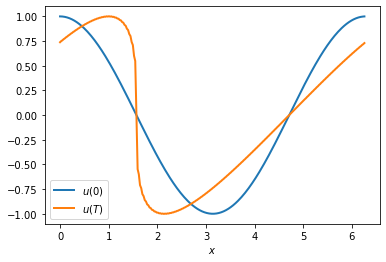

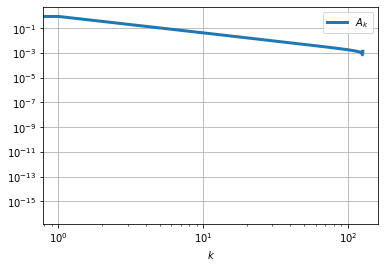

In [16]:
L = 2*np.pi
N=256
dt = 0.001
T = 1
A = 1.
k = 1.
phi = 0
x,kx,dx = init_domain(N,L)
u0 = u_exact(0.,x,c,A,k,phi)
u = time_advancement_nonlinear_pure_advection(u0,T,dt,kx,dx)
plt.figure()
plt.plot(x,u0,lw = 2,label="$u(0)$")
plt.plot(x,u,lw = 2,label="$u(T)$")
plt.legend()
plt.xlabel("$x$")
plt.show()

Fu = np.fft.fft(u)/(N//2)
Ak = np.sqrt(np.real(Fu[0:N//2])**2+np.imag(Fu[0:N//2])**2)
plt.loglog(kx[0:N//2],Ak,lw=3,label="$A_k$")
plt.xlabel("$k$")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
du_x

In [ ]:
du

In [ ]:
plt.plot(x,du-du_x)
plt.show()